In [10]:
# import old geuser data and place it on a X matrix
import numpy

f = open("./geyser.txt")
X = []
for line in f:
    erup, wait = line.split()
    X.append([erup, wait])
X = numpy.array(X[1:]).astype(float)
print(X.shape)

(272, 2)


In [11]:
# question 3a
# ask TA on his office hours

# kmeans is a subset of gmm algorithms where we disregard variance and only focus on the mean part of the algorithm
# kmeans tackle the absence of variance in it by assigning the closest point to each mean to each cluster

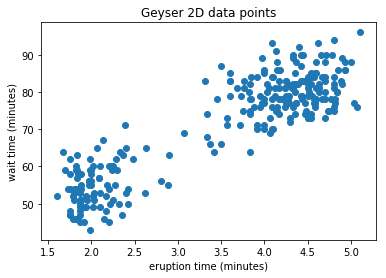

In [12]:
# question 3b: plot X points in 2D chart
import matplotlib.pyplot as plot

plot.figure()
plot.title("Geyser 2D data points")
plot.ylabel("wait time (minutes)")
plot.xlabel("eruption time (minutes)")
plot.scatter(X[:,0],X[:,1])
plot.show()

In [13]:
# Implement a bimodal Gaussian mixture model to fit all data in X
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import random

def phi(mu, S, x):
    return numpy.array(multivariate_normal.pdf(x, mean = mu, cov=S))

def random_sample(X):
    selected = random.randint(0,len(X) - 1)
    return X[selected,:]

def update_mu(responsability, X):
    one_minus_resp = numpy.repeat(responsability ,repeats=2,axis=1)
    numerator = numpy.sum(numpy.multiply(one_minus_resp, X),axis=0)
    denominator = numpy.sum(one_minus_resp,axis=0)
    return numpy.divide(numerator,denominator)

def update_cov(responsability, mu, X):
    denominator = numpy.sum(responsability)
    one_minus_resp = numpy.repeat(responsability ,repeats=2,axis=1)
    x_minus_mu_squared = numpy.square(X - mu)
    numerator = numpy.sum(numpy.multiply(one_minus_resp, x_minus_mu_squared), axis=0)
    
def gmm_random_init(X, start, end):
    mu1_fixed = random_sample(X)
    mu2_fixed = random_sample(X)
    sigma1 = random.uniform(start,end)
    sigma2 = random.uniform(start,end)
    S1_fixed = numpy.array([[sigma1, 0],[0, sigma1]])
    S2_fixed = numpy.array([[sigma2, 0],[0, sigma2]])
    pi_fixed = random.uniform(0,1)
    
    return mu1_fixed, mu2_fixed, S1_fixed, S2_fixed, pi_fixed

def gmm_run(mu1_fixed, mu2_fixed, S1_fixed, S2_fixed, pi_fixed, X, make_chart=False):
    mu1 = mu1_fixed
    mu2 = mu2_fixed
    S1 = S1_fixed
    S2 = S2_fixed
    pi = pi_fixed

    cnt = 0
    for i in range(50):
        numerator1 = (1-pi)*phi(mu1,S1,X)
        denominator = (1-pi)*phi(mu1,S1,X) + pi*phi(mu2,S2,X)

    #     Calculate responsability
        responsability1 = numpy.divide(numerator1, denominator)

        if numpy.sum(mu1) - numpy.sum(update_mu(responsability1.reshape((len(responsability1),1)),X)) < 0.01:
            if numpy.sum(mu2) - numpy.sum(update_mu((1-responsability1).reshape((len(responsability1),1)),X)) < 0.01:
                break

        cnt += 1
    #     Update values
        mu1 = update_mu(responsability1.reshape((len(responsability1),1)),X)
        mu2 = update_mu((1-responsability1).reshape((len(responsability1),1)),X)

        S1 = update_cov((1-responsability1).reshape((len(responsability1),1)), mu1, X)
        S2 = update_cov((responsability1).reshape((len(responsability1),1)), mu2, X)

        pi = numpy.sum(responsability1)/len(responsability1)

        if make_chart:
            plot.scatter(X[:,0],X[:,1])
            plot.scatter(mu1[0],mu1[1], color="r")
            plot.scatter(mu2[0],mu2[1], color="y")
            plot.show()
    return cnt



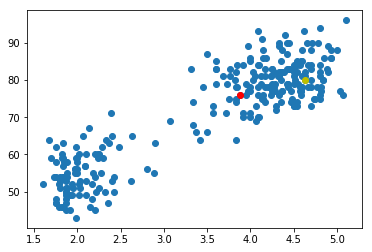

In [14]:
# question 3c_1, run bimodal gmm and plot mean tragectory

# random initialization of parameters
mu1_fixed, mu2_fixed, S1_fixed, S2_fixed, pi_fixed = gmm_random_init(X, 1, 2)

plot.scatter(X[:,0],X[:,1])
plot.scatter(mu1_fixed[0],mu1_fixed[1], color="r")
plot.scatter(mu2_fixed[0],mu2_fixed[1], color="y")
plot.show()


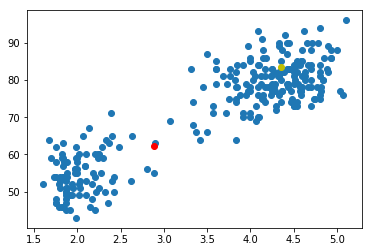

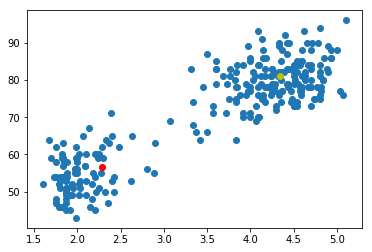

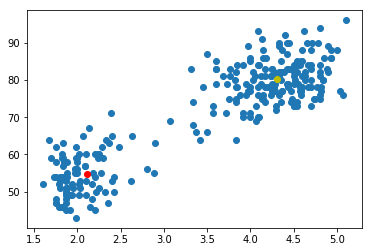

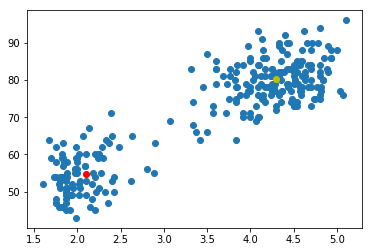

4

In [15]:
# question 3c_1, run bimodal gmm and plot mean tragectory

# questions for TA: how to tackle 0/0 = nan (zero sub enough)? why mu's chage place every it? 
gmm_run(mu1_fixed, mu2_fixed, S1_fixed, S2_fixed, pi_fixed, X, True)


C:\Users\Sung\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


[1, 0, 1, 0, 5, 1, 0, 1, 1, 2, 4, 1, 0, 4, 0, 0, 50, 5, 3, 5, 3, 1, 0, 0, 0, 1, 1, 5, 5, 4, 2, 2, 3, 5, 4, 0, 1, 50, 1, 4, 4, 4, 0, 2, 4, 0, 0, 2, 5, 5]


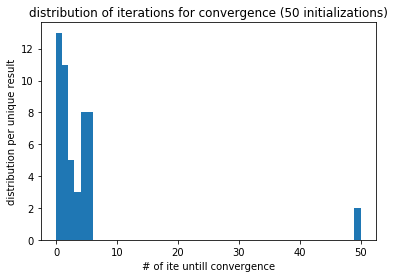

In [16]:
# question 3c_2 record number of iterations for 50 runs of bimodal gmm

cnt_list = [0 for cnt in range(50)]

for i in range(50):
    # random initialization of parameter
    mu1_fixed, mu2_fixed, S1_fixed, S2_fixed, pi_fixed = gmm_random_init(X, 1, 2)
    
    cnt_list[i] = gmm_run(mu1_fixed, mu2_fixed, S1_fixed, S2_fixed, pi_fixed, X)

print(cnt_list)
plot.hist(cnt_list, 50)
plot.title("distribution of iterations for convergence (50 initializations)")
plot.ylabel("distribution per unique result")
plot.xlabel("# of ite untill convergence")
plot.show()

[0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1
 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0
 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 1 0]


Text(0.5,1,'K-means clustering (k=2)')

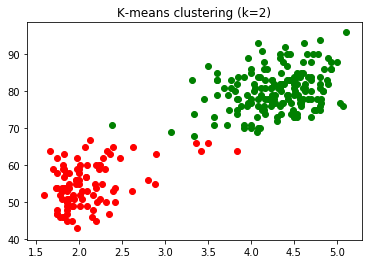

In [17]:
# question 3d: run k-mean with k=2 and estimate the guess and cov with maximum likelyhood

# how to estimate mean and cov using maximum estimation?
# calculate mean and covariance of cluster calculated with kmeans as initialization for gmm
# after kmeans, calculate mean and cov 4 each cluster and use them in another gmm run

from sklearn.cluster import KMeans

num_clusters = 2

kmeans = KMeans(n_clusters=num_clusters).fit_predict(X)

print(kmeans)

clusters = [[] for cluster in range(num_clusters)]
for idx in range(len(X)):
    clusters[kmeans[idx]].append(X[idx])

cluster1 = numpy.array(clusters[0])
cluster2 = numpy.array(clusters[1])

colors = ["r", "g", "b"]

plot.scatter(cluster1[:,0], cluster1[:,1], color="g")
plot.scatter(cluster2[:,0], cluster2[:,1], color="r")
plot.title("K-means clustering (k=2)")


# In their very essence, both gmm and kmeans are very similar to each other

In [18]:
# Estimate mean and covariance from the kmeans results

mean1 = numpy.sum(cluster1, axis=0)/len(cluster1)
mean2 = numpy.sum(cluster2, axis=0)/len(cluster2)

cov1 = numpy.array([[0,0],[0,0]])
cov2 = numpy.array([[0,0],[0,0]])

for i in range(len(cluster1)):
    cov1 = cov1 + numpy.dot(cluster1[i]-mean1,numpy.transpose(cluster1[i]-mean1))

for i in range(len(cluster2)):
    cov2 = cov2 + numpy.dot(cluster2[i]-mean2,numpy.transpose(cluster2[i]-mean2))

cov1 = cov1/len(cluster1)
cov2 = cov2/len(cluster2)

print(mean1,mean2, cov1, cov2)

# all in all, when it comes to mean estimation, both kmeans and gmm have converged to very similar final results.
# kmeans is overall faster than gmm since it essentially skips covariance calculations
# this is why kmeans is usually run before gmm to estimate its best initialization values

[ 4.29793023 80.28488372] [ 2.09433 54.75   ] [[31.66041192 31.66041192]
 [31.66041192 31.66041192]] [[34.5617787 34.5617787]
 [34.5617787 34.5617787]]


# References

* https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
* https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html
* https://www.youtube.com/watch?v=qMTuMa86NzU
* https://docs.python.org/3/library/random.html